In [2]:
!python --version

Python 3.10.2


In [3]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
dataset = load_iris()
X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X, columns=dataset.feature_names)
df['label'] = y

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
means, stds = df.iloc[:, 0:-1].mean(), df.iloc[:, 0:-1].std()

In [7]:
mean_per_type = dict()
std_per_type = dict()
labels = df['label'].unique()
for label in labels:
    mask = df['label'] == label
    mean_per_type[label] = dict(df[mask].iloc[:, :-1].mean())
    std_per_type[label] = dict(df[mask].iloc[:, :-1].std())


In [8]:
std_per_type

{0: {'sepal length (cm)': 0.35248968721345136,
  'sepal width (cm)': 0.3790643690962887,
  'petal length (cm)': 0.17366399648018407,
  'petal width (cm)': 0.10538558938004565},
 1: {'sepal length (cm)': 0.5161711470638634,
  'sepal width (cm)': 0.3137983233784114,
  'petal length (cm)': 0.46991097723995795,
  'petal width (cm)': 0.19775268000454405},
 2: {'sepal length (cm)': 0.6358795932744322,
  'sepal width (cm)': 0.32249663817263746,
  'petal length (cm)': 0.5518946956639834,
  'petal width (cm)': 0.2746500556366674}}

In [9]:
mean_per_type

{0: {'sepal length (cm)': 5.005999999999999,
  'sepal width (cm)': 3.428000000000001,
  'petal length (cm)': 1.4620000000000002,
  'petal width (cm)': 0.2459999999999999},
 1: {'sepal length (cm)': 5.936,
  'sepal width (cm)': 2.7700000000000005,
  'petal length (cm)': 4.26,
  'petal width (cm)': 1.3259999999999998},
 2: {'sepal length (cm)': 6.587999999999998,
  'sepal width (cm)': 2.9739999999999998,
  'petal length (cm)': 5.552,
  'petal width (cm)': 2.026}}

In [11]:
from itertools import combinations
comb = list(combinations(mean_per_type.keys(), 2))

for c in comb:
    mean1 = mean_per_type[c[0]]
    mean2 = mean_per_type[c[1]]
    std1 = std_per_type[c[0]]
    std2 = std_per_type[c[1]]
    print(32*"#")
    print(f"{str(dataset.target_names[c[0]]).upper()} vs {str(dataset.target_names[c[1]]).upper()}")
    for key in mean1.keys():
        print(f"{key}")
        print(f"\tmean = {mean1[key]-mean2[key]:.2f}")
        print(f"\tstd = {std1[key]-std2[key]:.2f}")

    print(32*"#","\n")


################################
SETOSA vs VERSICOLOR
sepal length (cm)
	mean = -0.93
	std = -0.16
sepal width (cm)
	mean = 0.66
	std = 0.07
petal length (cm)
	mean = -2.80
	std = -0.30
petal width (cm)
	mean = -1.08
	std = -0.09
################################ 

################################
SETOSA vs VIRGINICA
sepal length (cm)
	mean = -1.58
	std = -0.28
sepal width (cm)
	mean = 0.45
	std = 0.06
petal length (cm)
	mean = -4.09
	std = -0.38
petal width (cm)
	mean = -1.78
	std = -0.17
################################ 

################################
VERSICOLOR vs VIRGINICA
sepal length (cm)
	mean = -0.65
	std = -0.12
sepal width (cm)
	mean = -0.20
	std = -0.01
petal length (cm)
	mean = -1.29
	std = -0.08
petal width (cm)
	mean = -0.70
	std = -0.08
################################ 



In [12]:
minimum = df[df['label'] == 0]['sepal length (cm)'].min()
maximum = df[df['label'] == 0]['sepal length (cm)'].max()
x = np.linspace(minimum-2, maximum+2, 100)

In [15]:
prova = df[df['label'] == 0]['sepal length (cm)']

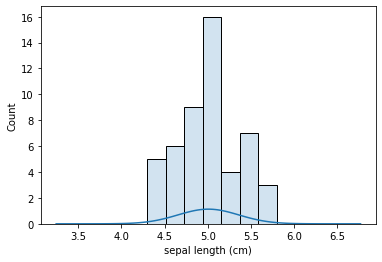

In [33]:
sns.histplot(data=prova, alpha=0.2)
plt.plot(x, norm(u,s).pdf(x),)

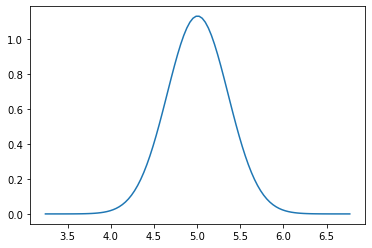

In [26]:
from scipy.stats import norm
u = mean_per_type[0]['sepal length (cm)']
s = std_per_type[0]['sepal length (cm)']
x = np.linspace(u-5*s, u+5*s, 100)

plt.plot(x, norm(u,s).pdf(x),)

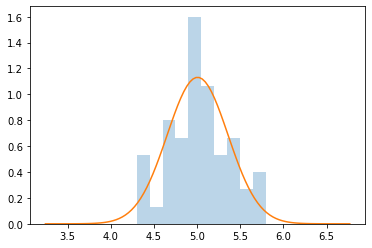

In [35]:
plt.hist(prova, alpha=0.3, density=True) # Density to return the density and not the count
plt.plot(x, norm(u,s).pdf(x),)